##### Instructions
In this exercise, you will work with the “Blues Guitarists Hand Posture and Thumbing Style by Region and Birth Period” data.  This dataset has 93 entries of various blues guitarists born between 1874 and 1940. 

- Regions: 1 means East, 2 means Delta, 3 means Texas
- Years: 0 for those born before 1906, 1 for the rest
- Hand postures: 1= Extended, 2= Stacked, 3=Lutiform
- Thumb styles: Between 1 and 3, 1=Alternating, 2=Utility, 3=Dead

Step 1: Using decision tree on this dataset, how accurately can you tell their birth year (y) from their hand postures and thumb styles (X). How does it affect the evaluation when you include the region while training the model?

In [1]:
import pandas as pd  #import modules 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
blues = pd.read_csv('/Users/jennyskytta/Downloads/blueshand.csv') # load in data csv
blues.head()  # looking at the data 

,name,state,brthYr,post1906,region,handPost,thumbSty
0,Henry Thomas,TX,1874,0,3,1,3
1,Frank Stokes,TN,1887,0,2,1,3
2,Sam Collins,MS,1887,0,2,1,2
3,Peg Leg Howell,GA,1888,0,1,2,2
4,Huddie Ledbetter,TX,1888,0,3,2,3


In [3]:
print(blues["handPost"].unique())
print('\n')
print(blues["thumbSty"].unique())
print('\n')
print(blues["brthYr"].unique()) 
print('\n')
print(blues["post1906"].unique()) 

[1 2 3]


[3 2 1]


[1874 1887 1888 1890 1893 1895 1896 1897 1898 1900 1901 1902 1903 1904
 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918
 1919 1920 1921 1924 1925 1926 1927 1928 1929 1930 1932 1933 1935 1936
 1938 1940]


[0 1]


After looking at the arrays, there are far too many unique values in 'Birthyr' for the 3 data points in handPost and  to predict which intuitively doesn't make much sense.  It does appear that there is another birth year parameter called Post1906 that does also narrow down birthyear.  This one appears to be binomial which may be a more optimal choice.  Moving forward, I will use Post1906 as my y variable.

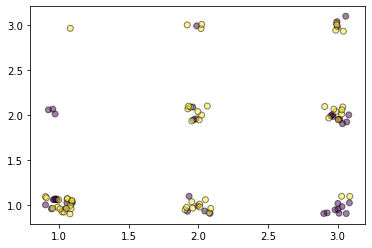

In [4]:
handPost = blues.handPost + np.random.uniform(-0.1, 0.1, size=93)
thumbsty=blues.thumbSty + np.random.uniform(-0.1, 0.1, size=93)
_=plt.scatter(thumbsty, handPost,c=blues.post1906, alpha=0.5, edgecolor="black")

Based on this pairplot, I do not have high expectations that there is much value in identifying year from hand posture or thumb style.  The main issue here is that we are predicting a variable (birth year) that outweighs our predictive variables.  

### Decision Tree

In [5]:
X = blues[["handPost","thumbSty"]]
y = blues.post1906
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)   # fit our decision tree model with training data 

DecisionTreeClassifier()

In [7]:
predictions = dtree.predict(X_test) # start predictions

In [8]:
dtree.score(X_test,y_test)  # I see 61% accuracy with this model 

0.6071428571428571

Predicting hand posture and thumb style from birth year is absolutely useless and horrible with no predictive ability at all. I will add in region to see if this has preditive value.

In [31]:
X2 = blues[["handPost","thumbSty","region"]]  # adding Region into the multivariate model
y2 = blues.post1906
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.30)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)   # fit our decision tree model with training data 
predictions = dtree.predict(X_test) # start predictions
dtree.score(X_test,y_test) # still at 65% accuracy 

0.6785714285714286

Essentially, you cannot predict the birthyear from the variables given however, if you are identifying a year delineation as post 1906, you can poorly predict whether they were both pre or post 1906 with the variables of thumb style and hand posture. Adding the variable of Region does slightly improve the model.

### Random Forest

Step 2: Now do the same using random forest (in both of the above cases) and report the difference. Make sure to use appropriate training-testing parameters for your evaluation.

You should also run the algorithms multiple times, measure various accuracies, and report the average (and perhaps the range).

In [24]:
from sklearn.ensemble import RandomForestClassifier

X = blues[["handPost","thumbSty"]]
y = blues.post1906
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
m = RandomForestClassifier(n_estimators=100)
_ = m.fit(X_test, y_test)
m.score(X_test, y_test).mean() # performs about the same as decision tree alone at 64%

0.75

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
m = RandomForestClassifier(n_estimators=300)
_ = m.fit(X_test, y_test)
m.score(X_test, y_test).mean()  #increasing the number of trees helps performance but defintely overfitting

0.6428571428571429

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
m = RandomForestClassifier(n_estimators=50)
_ = m.fit(X_test, y_test)
m.score(X_test, y_test).mean()  #decreasing trees does not harm the model here at 76%

0.8928571428571429

In [30]:
rfc_pred = m.predict(X_test)
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.88      1.00      0.93        21

    accuracy                           0.89        28
   macro avg       0.94      0.79      0.83        28
weighted avg       0.91      0.89      0.88        28



In [15]:
X2 = blues[["handPost","thumbSty","region"]]  # adding Region into the multivariate model
y2 = blues.post1906
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30)
m = RandomForestClassifier(n_estimators=500)
_ = m.fit(X2_test, y2_test)
m.score(X2_test, y2_test).mean()  
# region does improve the model at 93% average accuracy but with 500 trees a serious overfit 

0.9285714285714286

In [16]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30)
m = RandomForestClassifier(n_estimators=100)
_ = m.fit(X2_test, y2_test)
m.score(X2_test, y2_test).mean()  # with 100 trees, we see 82% average accuracy 

0.8214285714285714

In [17]:
rf_pred = m.predict(X2_test)
print(classification_report(y2_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.13      0.22      0.17         9
           1       0.46      0.32      0.37        19

    accuracy                           0.29        28
   macro avg       0.30      0.27      0.27        28
weighted avg       0.36      0.29      0.31        28



In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(n_estimators=100)
trees, train_loss, test_loss = [], [], []
for iter in range(50):
  rf.fit(X2_train, y2_train)
  y_train_predicted = rf.predict(X2_train)
  y_test_predicted = rf.predict(X2_test)
  mse_train = mean_squared_error(y2_train, y_train_predicted)
  mse_test = mean_squared_error(y2_test, y_test_predicted)
  print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
  trees += [rf.n_estimators]
  train_loss += [mse_train]
  test_loss += [mse_test]
  rf.n_estimators += 5

Iteration: 0 Train mse: 0.15899015054415344 Test mse: 0.29778599424433416
Iteration: 1 Train mse: 0.1587850300919759 Test mse: 0.3053328918263696
Iteration: 2 Train mse: 0.1588667111570382 Test mse: 0.3038733837295406
Iteration: 3 Train mse: 0.15873335228964985 Test mse: 0.30371688227168014
Iteration: 4 Train mse: 0.15920377385200463 Test mse: 0.3073349158747926
Iteration: 5 Train mse: 0.15876047080558883 Test mse: 0.3073536800596538
Iteration: 6 Train mse: 0.15916382162959117 Test mse: 0.3049394436919507
Iteration: 7 Train mse: 0.159732632468649 Test mse: 0.29251494228287855
Iteration: 8 Train mse: 0.15941229013986843 Test mse: 0.3005141857174229
Iteration: 9 Train mse: 0.15901992812868207 Test mse: 0.30349292662230537
Iteration: 10 Train mse: 0.1592693073710709 Test mse: 0.3006173808406558
Iteration: 11 Train mse: 0.15960378253739183 Test mse: 0.3007425967462782
Iteration: 12 Train mse: 0.15896946740920975 Test mse: 0.30579535760525894
Iteration: 13 Train mse: 0.15927174726824636 Tes

The MSE isn't greatly altered with the slight increase of trees but we can see that its high overall so the data is quite variable and the bias-variance tradeoff in action. 